# Modelado de datos base Datos Agrario

Tomando los archivos procesados de la sección de Limpieza de datos

## Exploración inicial de los datos

A continuación se presenta la exploración inicial del conjunto de datos acerca del data set **Base_Agricola.cvs** correspondiente a evaluaciones agropecuarias en el departamento de Boyacá

In [1]:
#importaciones de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importacion de los datos a df_agro
path_procces = '../Datos/Procesados/Base_Agricola.csv'
df_agro = pd.read_csv(path_procces,sep=';')
df_agro.head()

,codDaneDpto,Dpto,codDaneMunicipio,Municipio,desagregacionCultivo,Cultivo,cicloDelCultivo,grupoCultivo,Subgrupo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,nombreCientificoCultivo,codCultivo,estadoFisicoCultivo
0,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2019,A,170.0,170.0,2550.0,15.0,Arracacia xanthorrhiza,1080200,En fresco
1,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2020,A,150.0,150.0,3750.0,25.0,Arracacia xanthorrhiza,1080200,En fresco
2,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2021,A,180.0,180.0,4500.0,25.0,Arracacia xanthorrhiza,1080200,En fresco
3,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2022,A,160.0,180.0,4500.0,25.0,Arracacia xanthorrhiza,1080200,En fresco
4,15,Boyacá,15001,Tunja,Arracacha,Arracacha,Transitorio,Raíces y tubérculos,Raíces y tubérculos,2023,A,50.0,150.0,3750.0,25.0,Arracacia xanthorrhiza,1080200,En fresco


Acontinución se realiza un analisis de los datos Númericos con el fin de comprender el conjunto de datos

In [3]:
df_agro[['areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12265 entries, 0 to 12264
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   areaSembradaHa    12265 non-null  float64
 1   areaCosechadaHa   12265 non-null  float64
 2   produccionTon     12265 non-null  float64
 3   rendimientoTonHa  12265 non-null  float64
dtypes: float64(4)
memory usage: 383.4 KB


al visualizar los datos se detalla que estos estan en el formato incorrecto, estas medidas corresponde a datos de tipo numerico por lo tanto de procede a dar formato

### *Datos Númericos*
* areaSembradaHa
* areaCosechadaHa
* produccionTon
* rendimientoTonHa
* Anio 
* Periodo

#### *Anio*

2023    2613
2022    2588
2021    2461
2020    2342
2019    2261
Name: Anio, dtype: int64


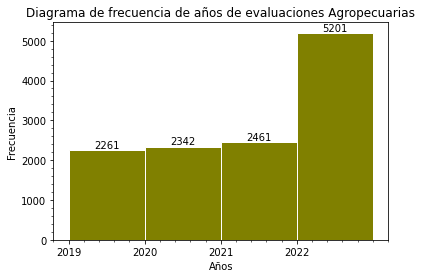

In [4]:
print(df_agro['Anio'].value_counts())
_,_,barraA = plt.hist(df_agro['Anio'],bins=4,edgecolor='white',color='olive')
plt.bar_label(barraA)
plt.title('Diagrama de frecuencia de años de evaluaciones Agropecuarias')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.minorticks_on()
plt.xticks(range(2019, 2023)) # ajuste de la escala en el eje x
plt.show()

#### *areaSembradaHa*

In [5]:
df_agro['areaSembradaHa'].describe()


count    12265.000000
mean        63.469671
std        258.288108
min          0.000000
25%          4.000000
50%         10.000000
75%         37.000000
max       7800.000000
Name: areaSembradaHa, dtype: float64

In [6]:
ls = df_agro['areaSembradaHa'].quantile(0.75) +1.5*(df_agro['areaSembradaHa'].quantile(0.75) - df_agro['areaSembradaHa'].quantile(0.25))
ls

86.5

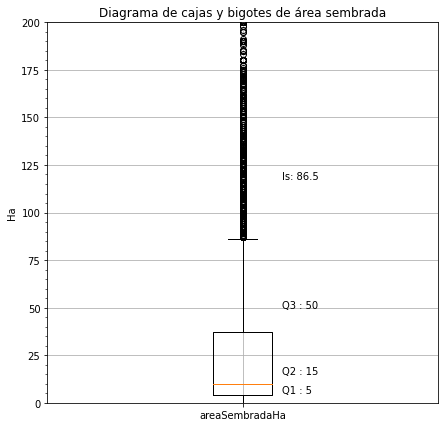

In [7]:
plt.figure(figsize=(7,7))
plt.boxplot(x = df_agro['areaSembradaHa'],labels=['areaSembradaHa'])
plt.annotate(f'ls: {ls}',xy=(1.1,117.5))
plt.annotate('Q1 : 5',xy=(1.1,5))
plt.annotate('Q2 : 15',xy=(1.1,15))
plt.annotate('Q3 : 50',xy=(1.1,50))
plt.ylim(0,200)
plt.grid()
plt.title('Diagrama de cajas y bigotes de área sembrada')
plt.ylabel('Ha')
plt.minorticks_on()
plt.show()

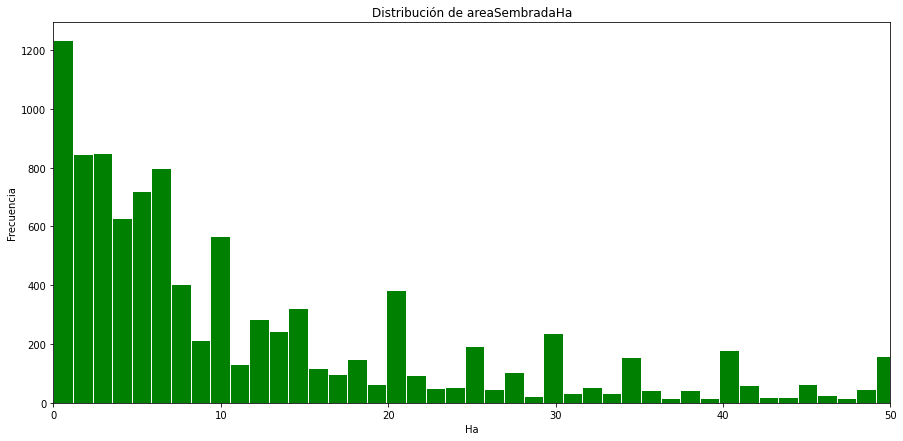

In [8]:
#grafico de frecuencia de areaSembradaHa
df_areaSembrada = df_agro[df_agro['areaSembradaHa']<=117]
plt.figure(figsize=(15,7))
plt.hist(df_areaSembrada['areaSembradaHa'],color='green',edgecolor='white',bins=100)
plt.xlim(0,50)
plt.title('Distribución de areaSembradaHa')
plt.xlabel('Ha')
plt.ylabel('Frecuencia')
plt.show()

#### *areaCosechadaHa*

In [9]:
#cambio de formato
estadistica = df_agro['areaCosechadaHa'].describe()
ls = estadistica[6] + 1.5*(estadistica[6] - estadistica[4])

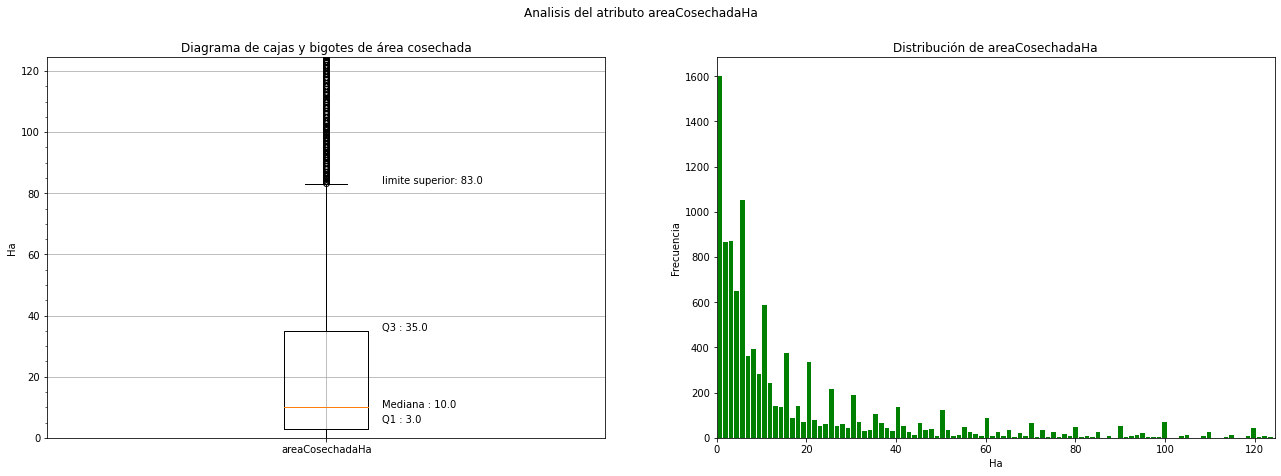

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,7))
plt.suptitle('Analisis del atributo areaCosechadaHa')
ax[0].boxplot(x = df_agro['areaCosechadaHa'],labels=['areaCosechadaHa'])
ax[0].annotate(f'limite superior: {ls}',xy=(1.1,int(ls)))
ax[0].annotate(f'Q1 : {estadistica[4]}',xy=(1.1,5))
ax[0].annotate(f'Mediana : {estadistica[5]}',xy=(1.1,estadistica[5]))
ax[0].annotate(f'Q3 : {estadistica[6]}',xy=(1.1,estadistica[6]))
ax[0].set_ylim(0,ls*1.5)
ax[0].grid()
ax[0].set_title('Diagrama de cajas y bigotes de área cosechada')
ax[0].set_ylabel('Ha')
ax[0].minorticks_on()

df_area = df_agro[df_agro['areaCosechadaHa']<=ls*1.5]

ax[1].hist(df_area['areaCosechadaHa'],color='green',edgecolor='white',bins=100)
ax[1].set_xlim(0,ls*1.5)
ax[1].set_title('Distribución de areaCosechadaHa')
ax[1].set_xlabel('Ha')
ax[1].set_ylabel('Frecuencia')
plt.show()

#### *produccionTon*

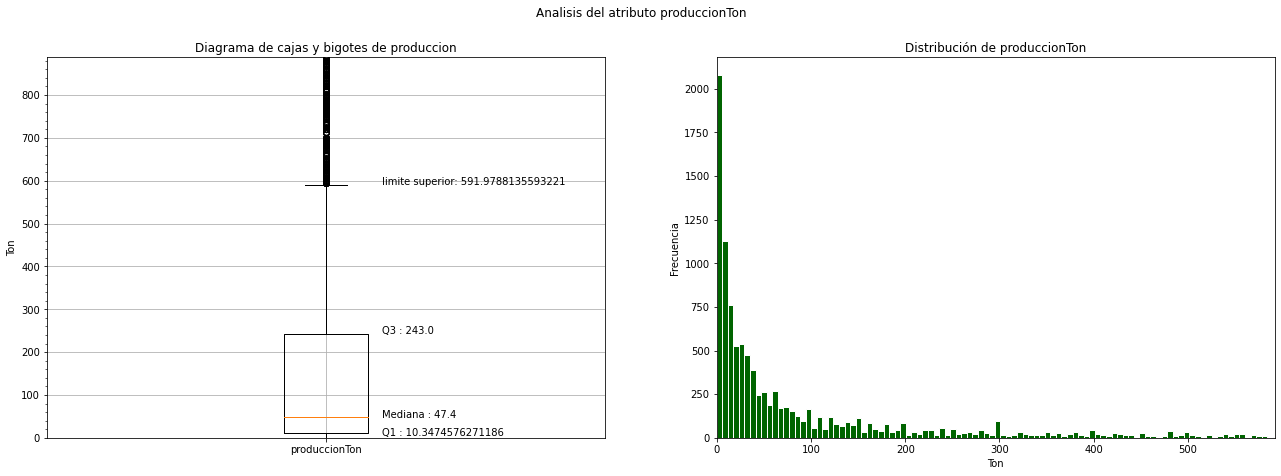

In [11]:
#cambio de formato
estadistica = df_agro['produccionTon'].describe()
ls = estadistica[6] + 1.5*(estadistica[6] - estadistica[4])

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,7))
plt.suptitle('Analisis del atributo produccionTon')
ax[0].boxplot(x = df_agro['produccionTon'],labels=['produccionTon'])
ax[0].annotate(f'limite superior: {ls}',xy=(1.1,int(ls)))
ax[0].annotate(f'Q1 : {estadistica[4]}',xy=(1.1,5))
ax[0].annotate(f'Mediana : {estadistica[5]}',xy=(1.1,estadistica[5]))
ax[0].annotate(f'Q3 : {estadistica[6]}',xy=(1.1,estadistica[6]))
ax[0].set_ylim(0,ls*1.5)
ax[0].grid()
ax[0].set_title('Diagrama de cajas y bigotes de produccion')
ax[0].set_ylabel('Ton')
ax[0].minorticks_on()

df_areaSembrada = df_agro[df_agro['produccionTon']<=ls]

ax[1].hist(df_areaSembrada['produccionTon'],color='darkgreen',edgecolor='white',bins=100)
ax[1].set_xlim(0,ls)
ax[1].set_title('Distribución de produccionTon')
ax[1].set_xlabel('Ton')
ax[1].set_ylabel('Frecuencia')
plt.show()

#### *rendimientoTonHa*

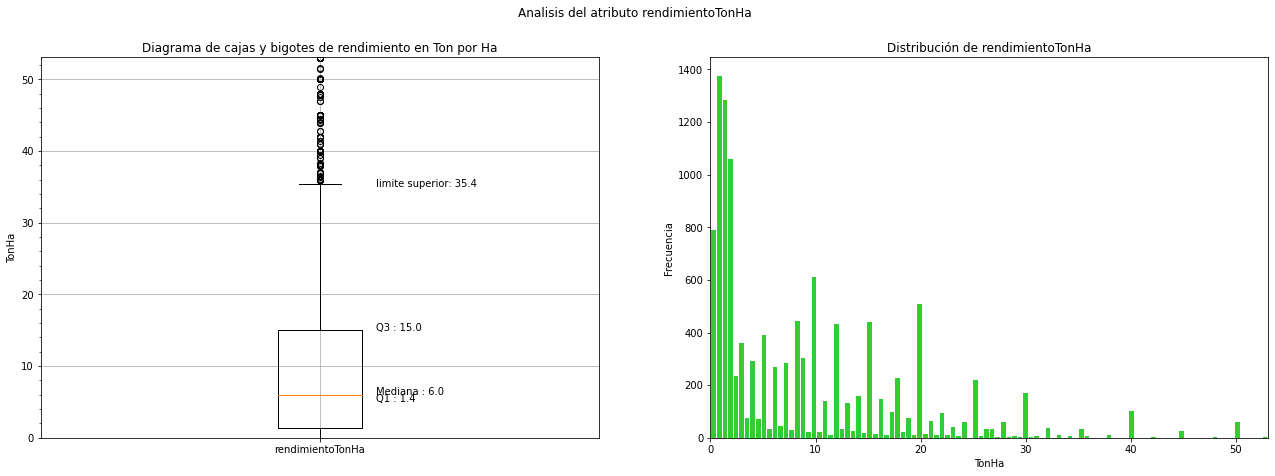

In [12]:
#cambio de formato
estadistica = df_agro['rendimientoTonHa'].describe()
ls = estadistica[6] + 1.5*(estadistica[6] - estadistica[4])

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,7))
plt.suptitle('Analisis del atributo rendimientoTonHa')
ax[0].boxplot(x = df_agro['rendimientoTonHa'],labels=['rendimientoTonHa'])
ax[0].annotate(f'limite superior: {ls}',xy=(1.1,int(ls)))
ax[0].annotate(f'Q1 : {estadistica[4]}',xy=(1.1,5))
ax[0].annotate(f'Mediana : {estadistica[5]}',xy=(1.1,estadistica[5]))
ax[0].annotate(f'Q3 : {estadistica[6]}',xy=(1.1,estadistica[6]))
ax[0].set_ylim(0,ls*1.5)
ax[0].grid()
ax[0].set_title('Diagrama de cajas y bigotes de rendimiento en Ton por Ha')
ax[0].set_ylabel('TonHa')
ax[0].minorticks_on()

df_areaSembrada = df_agro[df_agro['rendimientoTonHa']<=ls*1.5]

ax[1].hist(df_areaSembrada['rendimientoTonHa'],color='limegreen',edgecolor='white',bins=100)
ax[1].set_xlim(0,ls*1.5)
ax[1].set_title('Distribución de rendimientoTonHa')
ax[1].set_xlabel('TonHa')
ax[1].set_ylabel('Frecuencia')
plt.show()

Estadisticos descriptivos de las variables numericas

In [13]:
df_agro[['areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']].describe()

,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa
count,12265.000000,12265.000000,12265.000000,12265.000000
mean,63.469671,58.287274,1474.117619,11.016414
std,258.288108,225.079673,15730.594554,16.692874
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,10.347458,1.400000
50%,10.000000,10.000000,47.400000,6.000000
75%,37.000000,35.000000,243.000000,15.000000
max,7800.000000,5000.000000,600000.000000,320.000000


In [14]:
df_agro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12265 entries, 0 to 12264
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   codDaneDpto              12265 non-null  int64  
 1   Dpto                     12265 non-null  object 
 2   codDaneMunicipio         12265 non-null  int64  
 3   Municipio                12265 non-null  object 
 4   desagregacionCultivo     12265 non-null  object 
 5   Cultivo                  12265 non-null  object 
 6   cicloDelCultivo          12265 non-null  object 
 7   grupoCultivo             12265 non-null  object 
 8   Subgrupo                 12265 non-null  object 
 9   Anio                     12265 non-null  int64  
 10  Periodo                  12265 non-null  object 
 11  areaSembradaHa           12265 non-null  float64
 12  areaCosechadaHa          12265 non-null  float64
 13  produccionTon            12265 non-null  float64
 14  rendimientoTonHa      

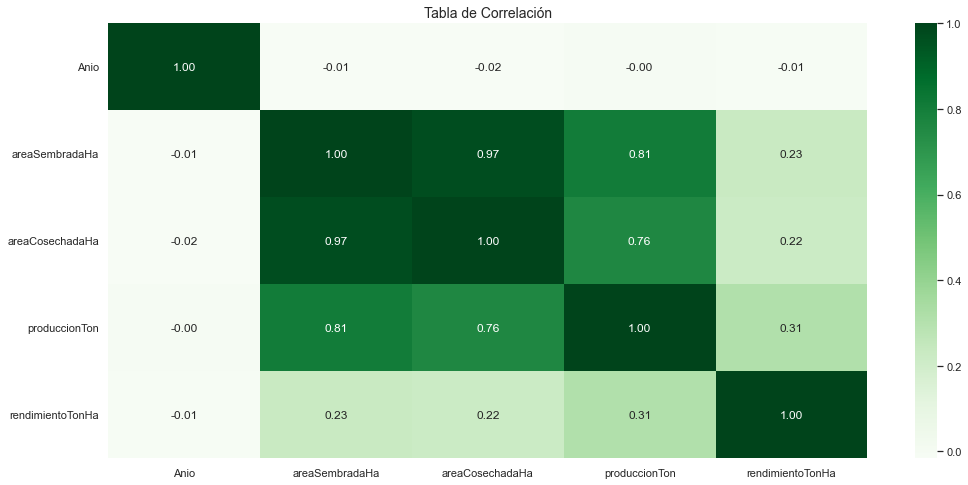

In [17]:
correlacion = df_agro.corr()
sns.set(rc={'figure.figsize':(17,8)})
sns.heatmap(correlacion,annot=True,fmt=".2f",cmap="Greens")
plt.title('Tabla de Correlación',fontsize=14)
plt.show()

Eliminación de datos redundantes

In [16]:
df_agro.drop(columns=['codDaneDpto','codDaneMunicipio','codCultivo'],inplace=True)
path_modelado = '../Datos/Modelado/Base_Agricola.csv'
df_agro.to_csv(path_modelado,index=False,sep=';')